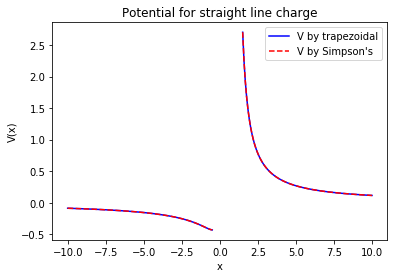

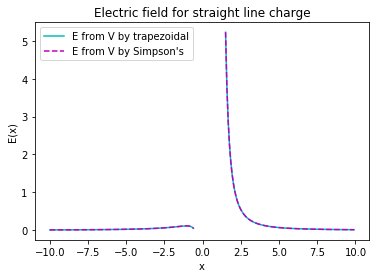

Text(0.5,0.92,'$E_y$ of right angle charge')

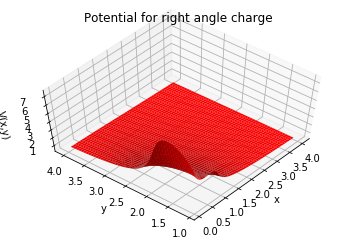

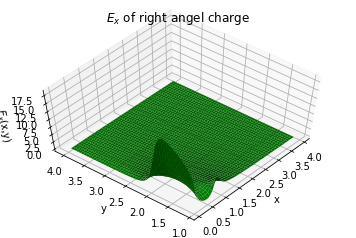

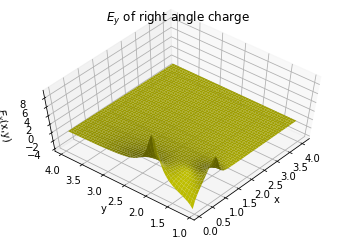

In [6]:
import scipy.integrate as sci
import numpy as np
import math
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

# Setting $\frac{1}{4\pi \epsilon_0}$ to 1 for this homework

# 1d straight line charge
f1=lambda x,r1: 2*r1/(x-r1)
f1vec=np.vectorize(f1)
r1=np.linspace(0,1,100)
r1_end = np.linspace(-10,-.5,100)
r1_front = np.linspace(1.5,10,100)

# potential of straight line charge
V1_trap_front =[]
V1_trap_end =[]
V1_simp_front=[]
V1_simp_end=[]
V1_quad=[]
v2_quad=[]


for i in r1_front:
    dV1=f1vec(i,r1)
    V1_trap_front.append(sci.trapz(r1,dV1)) # trapezoidal method
    V1_simp_front.append(sci.simps(r1,dV1)) # Simpson's rule
for j in r1_end:
    dV0=f1vec(j,r1)
    V1_trap_end.append(sci.trapz(r1,dV0)) # trapezoidal method
    V1_simp_end.append(sci.simps(r1,dV0)) # Simpson's rule
    
# electric field for straight line charge
E1_front_trap =-np.diff(V1_trap_front)/np.diff(r1_front)
E1_end_trap =-np.diff(V1_trap_end)/np.diff(r1_end)
E1_front_simp =-np.diff(V1_simp_front)/np.diff(r1_front)
E1_end_simp =-np.diff(V1_simp_end)/np.diff(r1_end)    

# plottign V of straight line charge   
pyplot.plot(r1_front,V1_trap_front,'b-')
pyplot.plot(r1_end,V1_trap_end,'b-', label="V by trapezoidal")
pyplot.plot(r1_front,V1_simp_front,'r--')
pyplot.plot(r1_end,V1_simp_end,'r--',label="V by Simpson's")
pyplot.xlabel('x')
pyplot.ylabel('V(x)')
pyplot.title("Potential for straight line charge")
pyplot.legend()
pyplot.show()

# Plotting E field of straight line charge
pyplot.plot(r1_front[0:99],E1_front_trap,'c-')
pyplot.plot(r1_end[0:99],E1_end_trap,'c-',label="E from V by trapezoidal")
pyplot.plot(r1_front[0:99],E1_front_simp,'m--')
pyplot.plot(r1_end[0:99],E1_end_simp,'m--',label="E from V by Simpson's")
pyplot.xlabel('x')
pyplot.ylabel('E(x)')
pyplot.title("Electric field for straight line charge")
pyplot.legend()
pyplot.show()


# right angle charge
x1 = np.linspace(0.1,4,50)
y1 = np.linspace(1.1,4,50)

# poteltial of right angle charge
V_rightangle = np.zeros((len(x1),len(y1))) 

for i,j in product(range(0,len(x1)),range(0,len(y1))):
    dVx=lambda x: x**2/((x1[i]-x)**2+(y1[j]-1)**2)**0.5
    dVy=lambda y: y/(x1[i]**2+(y1[j]-y)**2)**0.5
    V_rightangle[j,i]=sci.romberg(dVx,0,1)+sci.romberg(dVy,1,2)

# E field of right angle charge
E_rightangle_x = -np.diff(V_rightangle,axis=-1)/.1
E_rightangle_y = -np.diff(V_rightangle,axis=0)/.1   
        
# Plotting V of right angle charge
fig1 = pyplot.figure()
diagram1 = fig1.gca(projection='3d')
X1, Y1= np.meshgrid(x1, y1)
contour = diagram1.plot_surface(X1, Y1, V_rightangle,shade=True,color='r')
diagram1.set_xlabel('x')
diagram1.set_ylabel('y')
diagram1.set_zlabel('V(x,y)')
diagram1.view_init(60, 220)
diagram1.set_title('Potential for right angle charge')

# Plotting E_x of line charge
fig2 = pyplot.figure()
diagram_Ex = fig2.gca(projection='3d')
X2, Y2 = np.meshgrid(x1[0:(len(x1)-1)], y1)
contour2 = diagram_Ex.plot_surface(X2, Y2, E_rightangle_x, shade=True,color='g')
diagram_Ex.set_xlabel('x')
diagram_Ex.set_ylabel('y')
diagram_Ex.set_zlabel('$E_x$(x,y)')
diagram_Ex.view_init(60, 220)
diagram_Ex.set_title('$E_x$ of right angel charge')


# Plotting E_y of line charge
fig3 = pyplot.figure()
diagram_Ey = fig3.gca(projection='3d')
X3, Y3 = np.meshgrid(x1, y1[0:len(y1)-1])
contour3 = diagram_Ey.plot_surface(X3, Y3, E_rightangle_y, shade=True,color='y')
diagram_Ey.set_xlabel('x')
diagram_Ey.set_ylabel('y')
diagram_Ey.set_zlabel('$E_y$(x,y)')
diagram_Ey.view_init(60, 220)
diagram_Ey.set_title('$E_y$ of right angle charge')

# disc charge


